#DSE 200 Final Exam
There are **seven** problems listed below in approximatly increacing difficulty and length.
Most problems involve just a couple lines of code denoted by comments within the code.
If a problem seems to require a ton of code you are likely over thinking it and should try to find a simpler solution.

Here are the topics of each problem:
1. Exception Handling
2. Unix Piping
3. Directory Walking
4. Linear Regression
5. Object Oriented Model Selection
6. Scraping
7. Matplotlib

This test is open internet; however, communication with your peers/others is strictly prohibited.  

Good Luck!

##Exception Handling

Write a function to add two numbers, if either of the arguements is not an int or float, throw a new ArguementsMustBeNumbers exception.

In [ ]:
class ArguementsMustBeNumbers(Exception):
    None

In [ ]:
x=1
type(x) in [float,int]

In [ ]:
def add_two(x,y):
    if False:#Check types of x and y
        raise ArguementsMustBeNumbers()
    return x+y


After this code is correctly implemented, the following code should print True 4 times (no exceptions should be uncaught).

In [ ]:
print add_two(1,1)==2
try:
    add_two("t",1)
    print False
except ArguementsMustBeNumbers:
    print True
try:
    add_two(2,"f")
    print False
except ArguementsMustBeNumbers:
    print True
try:
    add_two("t","f")
    print False
except ArguementsMustBeNumbers:
    print True

##Unix Piping 

Below we generate a file called ps_out which contains a details about all processes on our machine.  In particular it is a csv file containing the PID, Username which owns the process, and the percent of the CPU time occupied by it.

We'll ask you to process this file using unix tools.

In [ ]:
#Do not modify this section
!ps -Ao "pid,user,%cpu" | sed "s/^ *//" | sed "s/  */,/g" > ps_out
!head ps_out

First, using **only unix tools**, count the number of processes each user is running

In [ ]:
!cat ps_out #TODO

Second, using **only unix tools**, find the pid which is using the largest cpu %.

Your output should only be a single number (the process id consuming the largest cpu amount), i.e. `30048`

In [ ]:
!cat ps_out #TODO

##Directory Walking

Below we have written a program which uses os.walk, unix tools, and python to find the 3 longest files by line count within each directory under the /etc/ directory.

However, it is currently has several problems which you are tasked with fixing.

Here are the current problems which must be fixed:

1. the output is not sorted by line count
2. the "total" line listing the total lines across the directory is not a file and should be removed
3. more than three files are being printed
4. directories that contain no files are being printed

These issues should be resolved by using a combintation of python and or unix commands.  Please ensure the output format is not changed.

In [ ]:
import os
from itertools import chain,groupby
for d,ds,fs in os.walk("/tmp/"):
    #TODO: 1) Make output sorted by line count
    #      2) Remove the Total line
    #      3) Limit to 3 files per directory
    #      4) Ignore directories containing no files
    lines = !wc -l $d/* 2> /dev/null | sed "s/^ *//"
    
    files = []
    for line in lines:
        try:
            fields = line.split(" ")
            files.append((int(fields[0]),fields[1]))
        except ValueError:
            print "Bad line: " + line
                        
    print "Longest files in " + d + ":"
    for lc, f in files:
        print "\t%s\t%d" %(f,lc)
    print

##Linear Regression

In the file linear.csv there is a set of 100 x,y pairs of numbers in csv format.

About 10% of the lines have a missing y value.

Your goal is to do the following:

1. Preprocess the data to remove any points with a missing y value
2. Fit a linear regression model using sklearn's LinearRegression package
3. Plot a scatter plot of the populated x,y pairs as blue points and the best fit linear regression line in red

In [ ]:
#Do not modify
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
data = pd.read_csv("./linear.csv")
data.head()

1. Preprocess the data to remove any points with a missing y value

In [ ]:
training_data = #Todo

Fit a linear regression model using sklearn's LinearRegression package

In [ ]:
mdl = #Todo

#Print formula so we can see the best fit line
m = mdl.coef_[0]
b = mdl.intercept_
print "formula: y = %f x + %f" % (m,b)

Plot a scatter plot of the populated x,y pairs as blue points and the best fit linear regression line in red

In [ ]:
#Todo

##Object Oriented Model Selection

Throughout the quarter, several problems have involved choosing the best model from a set of candidate models to get the best accuracy.

Besides using it for selecting model hyperparmeters (as in grid search) or features, you can also use it to select the modeling method (regression, nearest neighbor, etc.).  

We define three steps on the way to finding the best model.

1. Define a base model class.
1. Define four models by inheriting from a base model class.
2. Use train/test errors to choose the best of the four model

#### The base class
We defined the base class, from which all of the other classes are derived.

In [ ]:
# Do not modify this code
class BaseModel:
    def __init__(self, train_x, train_y):
        """Abstract constructor, subclasses should train a model of their type here and store
           it in a way that predict can be used to compute predictions"""
        raise Exception("This is an abstract class")
        
    def predict(self, x):
        """Abstract method to compute a single prediction given a single example x"""
        raise Exception("This is an abstract class")
        
    def score(self, xs, ys):
        """Returns the accuracy of this model using xs as a list of inputs and ys as a list of correct values."""
        return sum([(self.model.predict(x)-y)**2 for x,y in zip(xs,ys)])/len(xs)
    

Now that you have implemented the BaseModel, implement a class for LinearModel, QuadraticModel, CubicModel, and QuarticModel. Use numpy's [polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function to find the coefficients ($a_i$) using the training data given as parameters `train_x, train_y` to the constructor.

The input to each model is the variable $x$ and the output is the variable $y$.  $a_i$ refers to the coefficients found by polyfit.

* **LinearModel** $y=a_1x+a_0$
* **QuadraticModel** $y=a_2x^2+a_1x+a_0$
* **CubicModel** $y=a_3x^3+a_2x^2+a_1x+a_0$
* **QuarticModel** $y=a_4x^4+a_3x^3+a_2x^2+a_1x+a_0$


In [ ]:
from numpy import polyfit

#This model has been solved as below, and can be used as reference to write classes for models ahead.

class LinearModel(BaseModel):
    def __init__(self, train_x, train_y):
        #calculate coefficients
        self.coef = polyfit(train_x, train_y,1)
        
    def predict(self, x):
        #use coeficients/formula to compute solution
        y = self.coef[0] * x + self.coef[1]
        return y

In [ ]:
class QuadraticModel(BaseModel):
    def __init__(self, train_x, train_y):
        #calculate coefficients
        
    def predict(self, x):
        y = #use coeficients/formula to compute solution
        return y

In [ ]:
class CubicModel(BaseModel):
    def __init__(self, train_x, train_y):
        #calculate coefficients
        
    def predict(self, x):
        y = #use coeficients/formula to compute solution
        return y

In [ ]:
class QuarticModel(BaseModel):
    def __init__(self, train_x, train_y):
        #calculate coefficients
        
    def predict(self, x):
        y = #use coeficients/formula to compute solution
        return y

Next, we evaluate each of these models on our data.  Fill in the parts of the function marked "TODO" below.

In [ ]:
#Load Data, do not modify
train = pd.read_csv("train_data.csv")
valid = pd.read_csv("validation_data.csv")
train_x = train["x"].tolist()
train_y = train["y"].tolist()
valid_x = valid["x"].tolist()
valid_y = valid["y"].tolist()

In [ ]:
Models = [LinearModel, QuadraticModel, CubicModel, QuarticModel]

train_error = []
valid_error = []
for Model in Models:
    mdl = #Todo: Learn model using technique
    train_error.append(mdl.score(train_x,train_y))
    valid_error.append(mdl.score(valid_x,valid_y))
    
#Todo: Find technique with minimum validation error

Finally plot the training and validation error on the same plot.  Have a legend denoting which line is validation/training error.

In [ ]:
#Todo: Plot data

##Scraping

Started as a travel journal, Lonely Planet has gone on to become the world’s most successful travel publisher, and they maintain an award winning website giving all the necessary details a traveller could ask for. 
In this question we will try to use their website lonelyplanet.com to find the top sightseeing places in San diego and how far they are from our current location

In order to do this, we will scrape the website to find the top sightseeing places and develop a table containing the name of the place and its corresponding latitude, longitude values. We will then define a function to calculate distance between two points given their latitude and longitude.

You can take your current location as UCSD Rady School of Management, with Latitude 32.88661 and longitude -117.24128

In [ ]:
#Do not modify
import lxml.html as lh
import requests
import urllib
import pandas as pd
import re

Here we download the index of san diego sights for us to process.

In [ ]:
#Do not modify
website = "http://www.lonelyplanet.com"
country = "usa"
city = "san-diego"
scrape_topic = "sights"
base_url = website+"/"+country+"/"+city+"/"+scrape_topic+"/"
r  = requests.get(base_url)
doc = lh.fromstring(r.content)

Once you have retrieved the entire data from the website, The urls can be printed as follows. 

In [ ]:
a_elements=doc.xpath('//a')
for a in a_elements:
    print a.xpath('@href')

the next step is to extract the URLs corresponding to specific sights. 

In order to do so, we need to define a regular expression for the links in which we are interested. 

Browsing the HTML of the site we find URLs of the following type

    1. /usa/san-diego/sights/
    2. /usa/san-diego/sights/nature-wildlife/san-diego-zoo
    3. /usa/san-diego/sights/architecture/hotel-del-coronado
    4. /usa/san-diego/sights/?page2=id
    5. /usa/san-diego/sights/?page1=id+data=x 

URLs like 2,3 correspond to pages of sights that we are interested in. On the other hand, URLs like 1,4,5 correspond to other information which is not of interest.
 
Write a regex pattern which parses all links starting with /usa/san-diego/sights/ followed by more characters. Make sure that the pattern does not allow links with question marks such as 4,5.

In [ ]:
pattern = #TODO: Write regex to match desired URLS here
url_list=[] #use the above pattern to create a list of matching urls

Now we extract the information about each sight, we provide the `makeRecord` function that takes a beutiful soup object and returns a Dictionary containing the location name, latitude, and longitude.

In [ ]:
#The following is a bottomline working code to proceed ahead if you are stuck. Points will be awarded form
def makeRecord(doc):
    record = {}
    div_elements=doc.xpath('//div')
    for div in div_elements:
        if len(div.xpath('@data-latitude'))>0:
            record["latitude"] =div.xpath('@data-latitude')[0]
        if len(div.xpath('@data-longitude'))>0:
            record["longitude"] =div.xpath('@data-longitude')[0]
        record["title"] = #write code to add title for the sight
    return record


Now loop through the sights pages you found and make records for each.  Fill in the template with the requested actions.

In [ ]:
website = "http://www.lonelyplanet.com"
sights_list = []

for url in url_list:
    new_url = website+url
    r    = #Use requests to get web page data
    doc = lh.fromstring(r.content)
    rec  = makeRecord(doc)
    sights_list.append(rec)
    
sights_list

Now that we have a table of sightseeiing places imediately around us along with their latitudes and longitudes, use the below function to find distance of each of the sightseeing place from your current location

In [ ]:
#Do not modify
import math
def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2) :
    R = 6371 # Radius of the earth in km
    dLat = deg2rad(lat2-lat1) # deg2rad below
    dLon = deg2rad(lon2-lon1) 
    a = math.sin(dLat/2)*math.sin(dLat/2)+math.cos(deg2rad(lat1))*math.cos(deg2rad(lat2))*math.sin(dLon/2)*math.sin(dLon/2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c #Distance in km
    return d


def deg2rad(deg) :
  return deg * (3.1416/180)


Now add a field to each record in `sights_list` called `distance` which reports the distance from the Rady School to it.  Then print the sights from closest to furthest

In [ ]:
myLat = 32.88661
myLng = -117.24128

for i in range(len(sights_list)):
    #Todo: add distance to record i in sights list
    
#Todo: sort sights_list

for record in sights_list:
    print record
    

## MatplotLib


In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In this exercise we will plot a list of datasets in the form of histograms in the same plot. For this we will use the function plotHistograms given below, which takes a dataset, and bin count and outputs a histogram plot containing multiple horizonta bars.

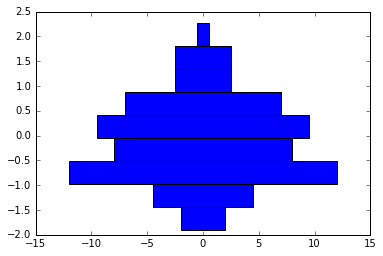

In [61]:
ax = plt.subplot(111)
def plotHistograms(data,binCount):
    minVal=np.min(data)
    maxVal=np.max(data)
    hist=np.histogram(data, range=(minVal,maxVal), bins=binCount)
    bin_edges = np.linspace(minVal, maxVal, binCount+1)
    centers = .5 * (bin_edges + np.roll(bin_edges, 1))[:-1]
    heights = np.diff(bin_edges)
    ax=plt.subplot(111)
    lefts = 0 - .5 * hist[0]
    ax.barh(centers, hist[0], height=heights, left=lefts)

data=np.random.normal(0, 1, 100)
binCount=10
plotHistograms(data,binCount)

Use the above function to plot multiple histograms on the same plot corresponding to the datasets given below. An example graph below shows how multiple histograms can be accommodated in the same plot. Use bin count of 100 for each of the histograms. You are free to modify the function, or write your own

In [3]:
number_of_data_points = 100
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points),
             np.random.normal(3, 1, number_of_data_points),
             np.random.normal(-6, 1, number_of_data_points),
             np.random.normal(12, 1, number_of_data_points)
            ]
ax = plt.subplot(111)
#Write code here


<img src="histograms.png">